<a href="https://colab.research.google.com/github/z-gursky/Alzheimer/blob/main/Alzheimer_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import lightgbm as ltb
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
import scipy
%matplotlib inline

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving Alzheimer.csv to Alzheimer.csv


In [ ]:
import io
alzheimer_df = pd.read_csv(io.BytesIO(data_to_load['Alzheimer.csv']))

This data comes from [Kaggle](https://www.kaggle.com/jboysen/mri-and-alzheimers)

***Dementia:***


> *Dementia is an overall term that desribes a group of symptoms associated with a decline in memory or other traits that may reduce the persons ability to perform everyday tasks/activities. Some dementia types are reversable and others have an onset after a stroke or over time.* (https://www.alz.org/alzheimers-dementia/what-is-dementia)

***Alzheimers:***


> Type of dementia that causes a decline in memory/thinking and problems with behavior. Symptoms for this type of dementia generally occur slowly overtime until they become severe enough to interfere with daily taks. 



*   **M/F:** *Gender*
*   **Hand:** *Dominant side*
*   **Age:** *150 Subjects aged 60-96*
*  **Education:** *Years of education*
*   **SES:** *Socioeconomic status. This was accessed with the Hollingshead four factor index ( Marital status, retired/employed status, educational attainment, and occuupational prestige) and put in categories ranging from 1 (highest status) to 5 (lowest status).* 
*  **MMSE:** *A test with a maximum score of 30 points with 0 being the worst and 30 being the best.*
***Mimi Mental State Examination:**
> The MMSE is used by doctors and clinicians to help access the severity and progression of dementia. It is a exam consisting of tests and questions and each one correctly answered adds to a a running tally. These questions can test anywhere from the patients memory to mental abilities. Other factors are considered alongside this examination and this test is also used to assess changes in patients already diagnosed with dementia. 
***MMSE Scoring**
  *   *20-24 indicates mild dementia*
  *   *13-20 suggests moderate dementia*
  *   *Less than 12 indicates severe dementia* 
  (www.alzheimers.org.uk/about-dementia/symptoms-and-diagnosis/diagnosis/mmse-test)
*   **CDR:** *Clinical Dementia Rating*
> *The Clinical Dementia Rating is a 5 point scale obtained through a semi-structured interview of the patient along with a reliable informant such as a family member. It consists of six domains, **Memory, Orientation, Judgement & Problem Solving, Community Affairs, Home & Hobbies, and Personal Care.** The scores are made by the clinician making appropriate ratings or by use of algorithm and the final scoring can be scene below,* 
  *   *0 = no dementia*
  *   *0.5 = very mild Alzheimer Disease*
  *   *1 = mild Alzheimer Disease*
  *   *2 = moderate Alzheimer Disease*
  *   *3 = Severe Alzheimer Disease*
  (https://www.madrc.org/clinical-dementia-rating-cdr-scale)
* ***Group:***
  *   *Non-Demented: A CDR score of 0*
  *   *Demented: A CDR score of 0.5, 1.0, 2.0 or 3.0*
  *   *Converted: A CDR originally 0.0 at the begining of the study and switched to 0.5 or higher by the end*
*   **eTIV:** *Estimated total intracranial volume, mm3*
> The ICV measure, sometimes referred to as total intracranial volume (TIV), refers to the estimated volume of the cranial cavity as outlined by the supratentorial dura matter or cerebral contour when dura is not clearly detectable. ICV is often used in studies involved with analysis of the cerebral structure under different imaging modalities, such as Magnetic Resonance (MR) , MR and Diffusion Tensor Imaging (DTI), MR and Single-photon Emission Computed Tomography (SPECT), Ultrasound and Computed Tomography (CT). ICV consistency during aging makes it a reliable tool for correction of head size variation across subjects in studies that rely on morphological features of the brain. ICV, along with age and gender are reported as covariates to adjust for regression analyses in investigating progressive neurodegenerative brain disorders, such as Alzheimer's disease, aging and cognitive impairment. ICV has also been utilized as an independent voxel based morphometric feature to evaluate age-related changes in the structure of premorbid brain, determine characterizing atrophy patterns in subjects with mild cognitive impairment (MCI) and Alzheimer's disease (AD), delineate structural abnormalities in the white matter (WM) in schizophrenia, epilepsy, and gauge cognitive efficacy
(https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4423585/)
*   **nWBV:** *Normalized whole-brain volume*  Normalized whole-brain volume, expressed as a percent of all voxels in the atlas-masked image that are labeled as gray or white matter by the automated tissue segmentation process
*   **ASF:** *Atlas scaling factor (unitless).*Atlas scaling factor (unitless). Computed scaling factor that transforms native-space brain and skull to the atlas target (i.e., the determinant of the transform matrix)



In [ ]:
alzheimer_df

,Subject ID,MRI ID,Group,Visit,MR Delay,Gendre,Hand,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,CDR
0,OAS2_0030,OAS2_0030_MR1,Nondemented,1,0,F,R,60,18,1.0,30.0,1402,0.822,1.252,0.0
1,OAS2_0174,OAS2_0174_MR1,Nondemented,1,0,M,R,60,12,4.0,30.0,1379,0.806,1.273,0.0
2,OAS2_0022,OAS2_0022_MR1,Nondemented,1,0,F,R,61,16,3.0,30.0,1313,0.805,1.337,0.0
3,OAS2_0066,OAS2_0066_MR1,Demented,1,0,M,R,61,18,1.0,30.0,1957,0.734,0.897,1.0
4,OAS2_0094,OAS2_0094_MR1,Nondemented,1,0,F,R,61,16,1.0,30.0,1513,0.771,1.160,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0051,OAS2_0051_MR2,Nondemented,2,457,F,R,94,23,1.0,29.0,1474,0.696,1.190,0.0
369,OAS2_0008,OAS2_0008_MR2,Nondemented,2,742,F,R,95,14,2.0,29.0,1257,0.703,1.396,0.0
370,OAS2_0087,OAS2_0087_MR1,Demented,1,0,F,R,96,17,1.0,26.0,1465,0.683,1.198,1.0
371,OAS2_0051,OAS2_0051_MR3,Nondemented,3,1526,F,R,97,23,1.0,30.0,1483,0.689,1.184,0.0


Before data cleaning or EDA I will be dropping the columns that will not be of use.
*   Subject ID
*   MRI ID
*   Visit
*   Hand (Everyone was right handed in this study)
*   MR Delay
*   CDR (CDR scores do classify patients into groups but anything above 0.0 is considered Demented which is the scope of this study)







In [ ]:
alzheimer_df.drop(['Visit', 'Hand', 'MR Delay', 'Subject ID', 'MRI ID', 'CDR'], axis=1, inplace=True)

I will be giving the group coloumn a binary class:


*   Class 0: Any persons who ended the study listed as non-demented (CDR score of 0)
*   Class 1: Any persons who ended the study listed as demented (CDR score of 0.5 - 3.0)



In [ ]:
alzheimer_df['Group'].replace(to_replace='Nondemented', value=0, inplace=True)
alzheimer_df['Group'].replace(to_replace='Demented', value=1, inplace=True)
alzheimer_df['Group'].replace(to_replace='Converted', value=1, inplace=True)

In [ ]:
# picture of the new dataframe
alzheimer_df

,Group,Gendre,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,0,F,60,18,1.0,30.0,1402,0.822,1.252
1,0,M,60,12,4.0,30.0,1379,0.806,1.273
2,0,F,61,16,3.0,30.0,1313,0.805,1.337
3,1,M,61,18,1.0,30.0,1957,0.734,0.897
4,0,F,61,16,1.0,30.0,1513,0.771,1.160
...,...,...,...,...,...,...,...,...,...
368,0,F,94,23,1.0,29.0,1474,0.696,1.190
369,0,F,95,14,2.0,29.0,1257,0.703,1.396
370,1,F,96,17,1.0,26.0,1465,0.683,1.198
371,0,F,97,23,1.0,30.0,1483,0.689,1.184


### ***Data Cleaning***

In [ ]:
alzheimer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    int64  
 1   Gendre  373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   eTIV    373 non-null    int64  
 7   nWBV    373 non-null    float64
 8   ASF     373 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 26.4+ KB


In [ ]:
# Which data is missing and how much? 
alzheimer_df.isnull().sum()*100/alzheimer_df.isnull().count()

Group     0.000000
Gendre    0.000000
Age       0.000000
EDUC      0.000000
SES       5.093834
MMSE      0.536193
eTIV      0.000000
nWBV      0.000000
ASF       0.000000
dtype: float64

It seems SES and MMSE encompasses the missing values in this dataset

In [ ]:
# Print all values that cannot be converted to float
for column_name in ["SES", 'MMSE']:
    print("These are the problematic values for the variable: {}".format(column_name))
    for value in alzheimer_df[column_name]:
        try:
            float(value)
        except:
            print(value)

These are the problematic values for the variable: SES
These are the problematic values for the variable: MMSE


Looks like the problematic values are empty, I will replace the empty values with mode for that specific column. 

In [ ]:
alzheimer_df["SES"].fillna(alzheimer_df["SES"].mode()[0], inplace=True)
alzheimer_df["MMSE"].fillna(alzheimer_df["MMSE"].mode()[0], inplace=True)
alzheimer_df.isnull().sum()*100/alzheimer_df.isnull().count()

Group     0.0
Gendre    0.0
Age       0.0
EDUC      0.0
SES       0.0
MMSE      0.0
eTIV      0.0
nWBV      0.0
ASF       0.0
dtype: float64

### ***EDA***

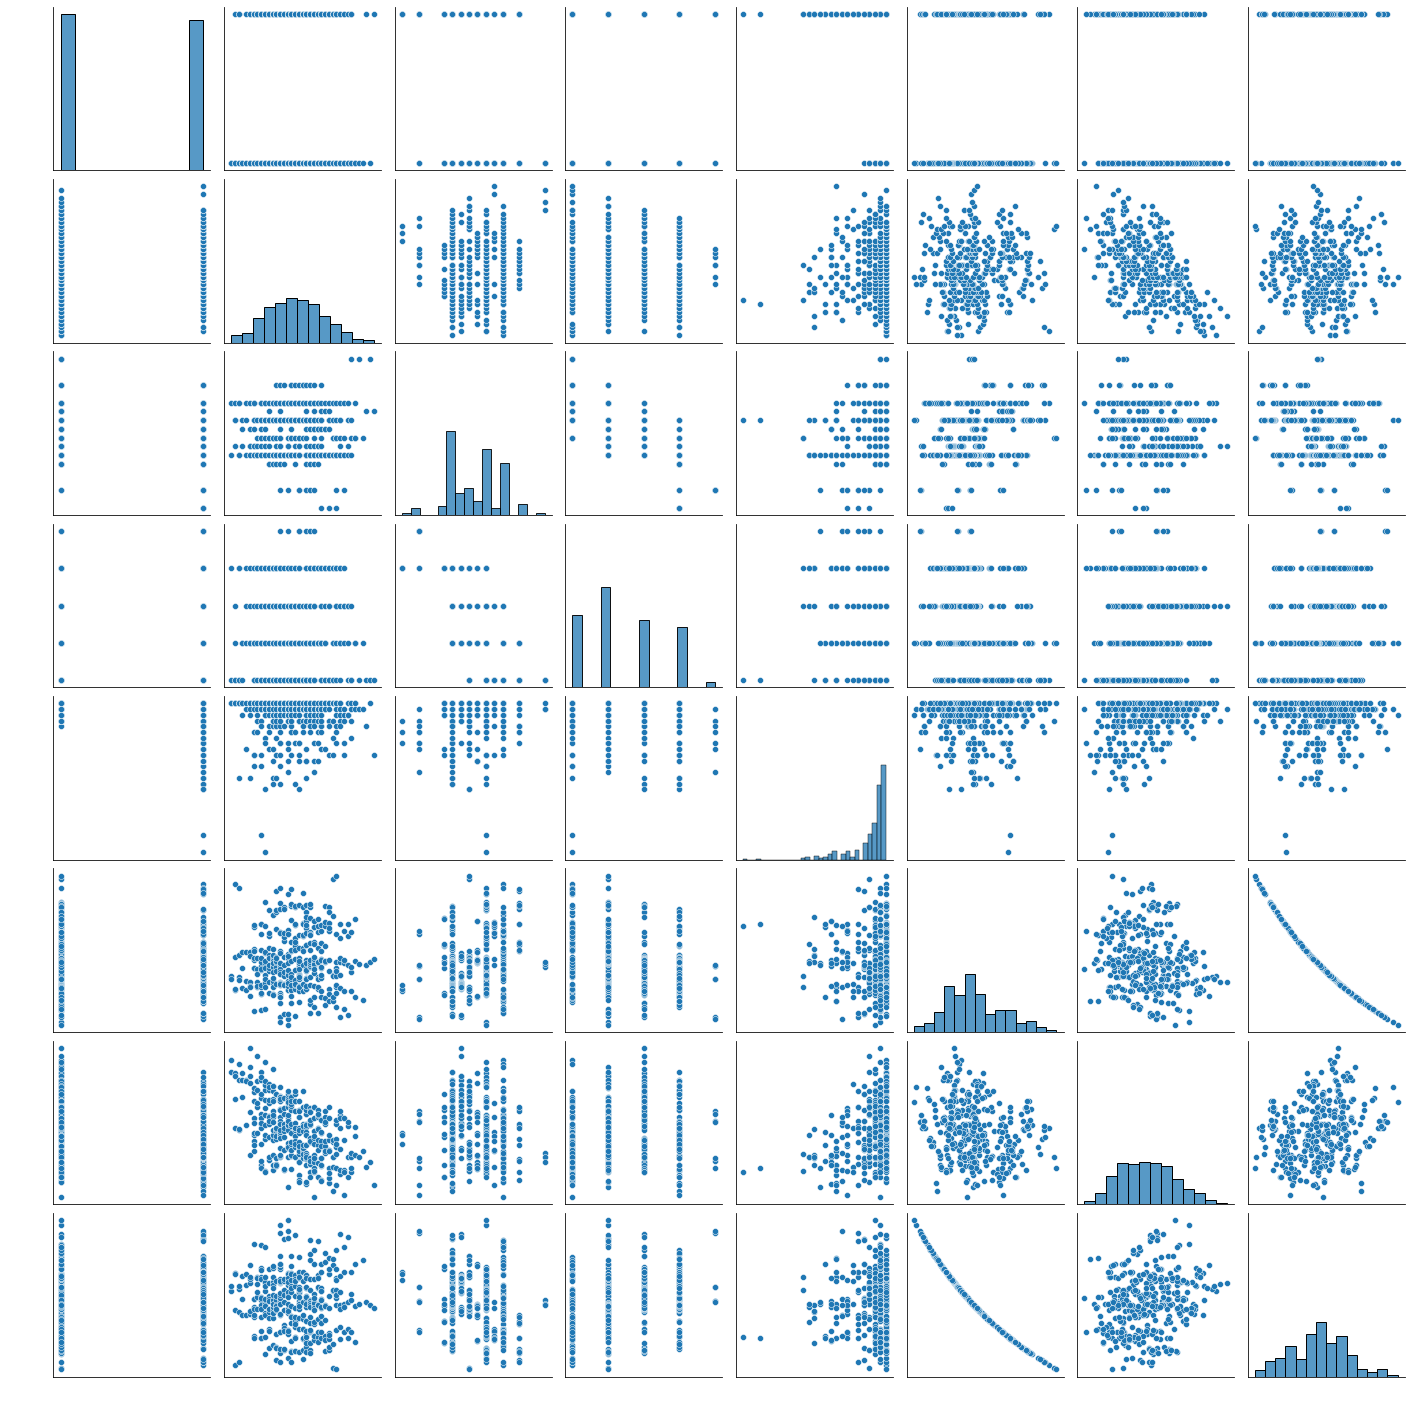

In [ ]:
# correlation between variables
with plt.rc_context({'xtick.color':'white', 'ytick.color':'white', 
                     'axes.labelcolor': 'white'}):
  sns.pairplot(data=alzheimer_df)

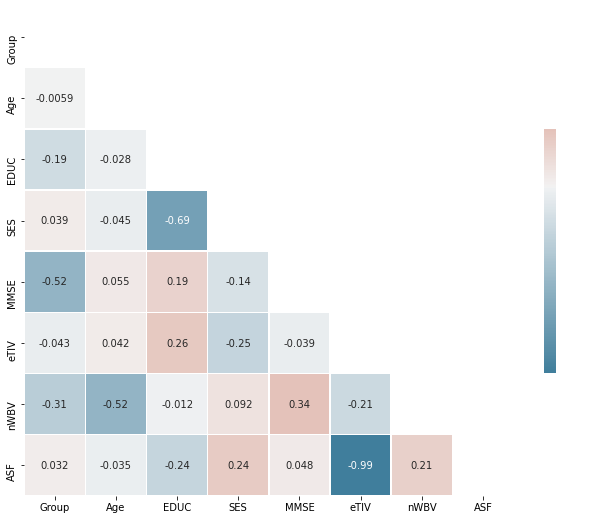

In [ ]:
# heat matrix between variables
corr = alzheimer_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
with plt.rc_context({'xtick.color':'white', 'ytick.color':'white', 
                     'axes.labelcolor': 'white'}):
  sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
              square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})

Group will be the predicted variable. Below we will see how it depends on different variables. 

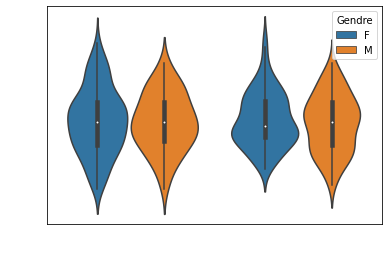

In [ ]:
with plt.rc_context({'xtick.color':'white', 'ytick.color':'white', 'axes.labelcolor': 'white'}):
  ax = sns.violinplot(x="Group", y="Age", hue='Gendre', data=alzheimer_df)

In [ ]:
# one hot encoding to convert Gendre from string to binary value
alzheimer_df = pd.concat([alzheimer_df,pd.get_dummies(alzheimer_df.Gendre, prefix="Gendre", drop_first=True)], axis=1)
alzheimer_df.drop(['Gendre'], axis=1, inplace=True)

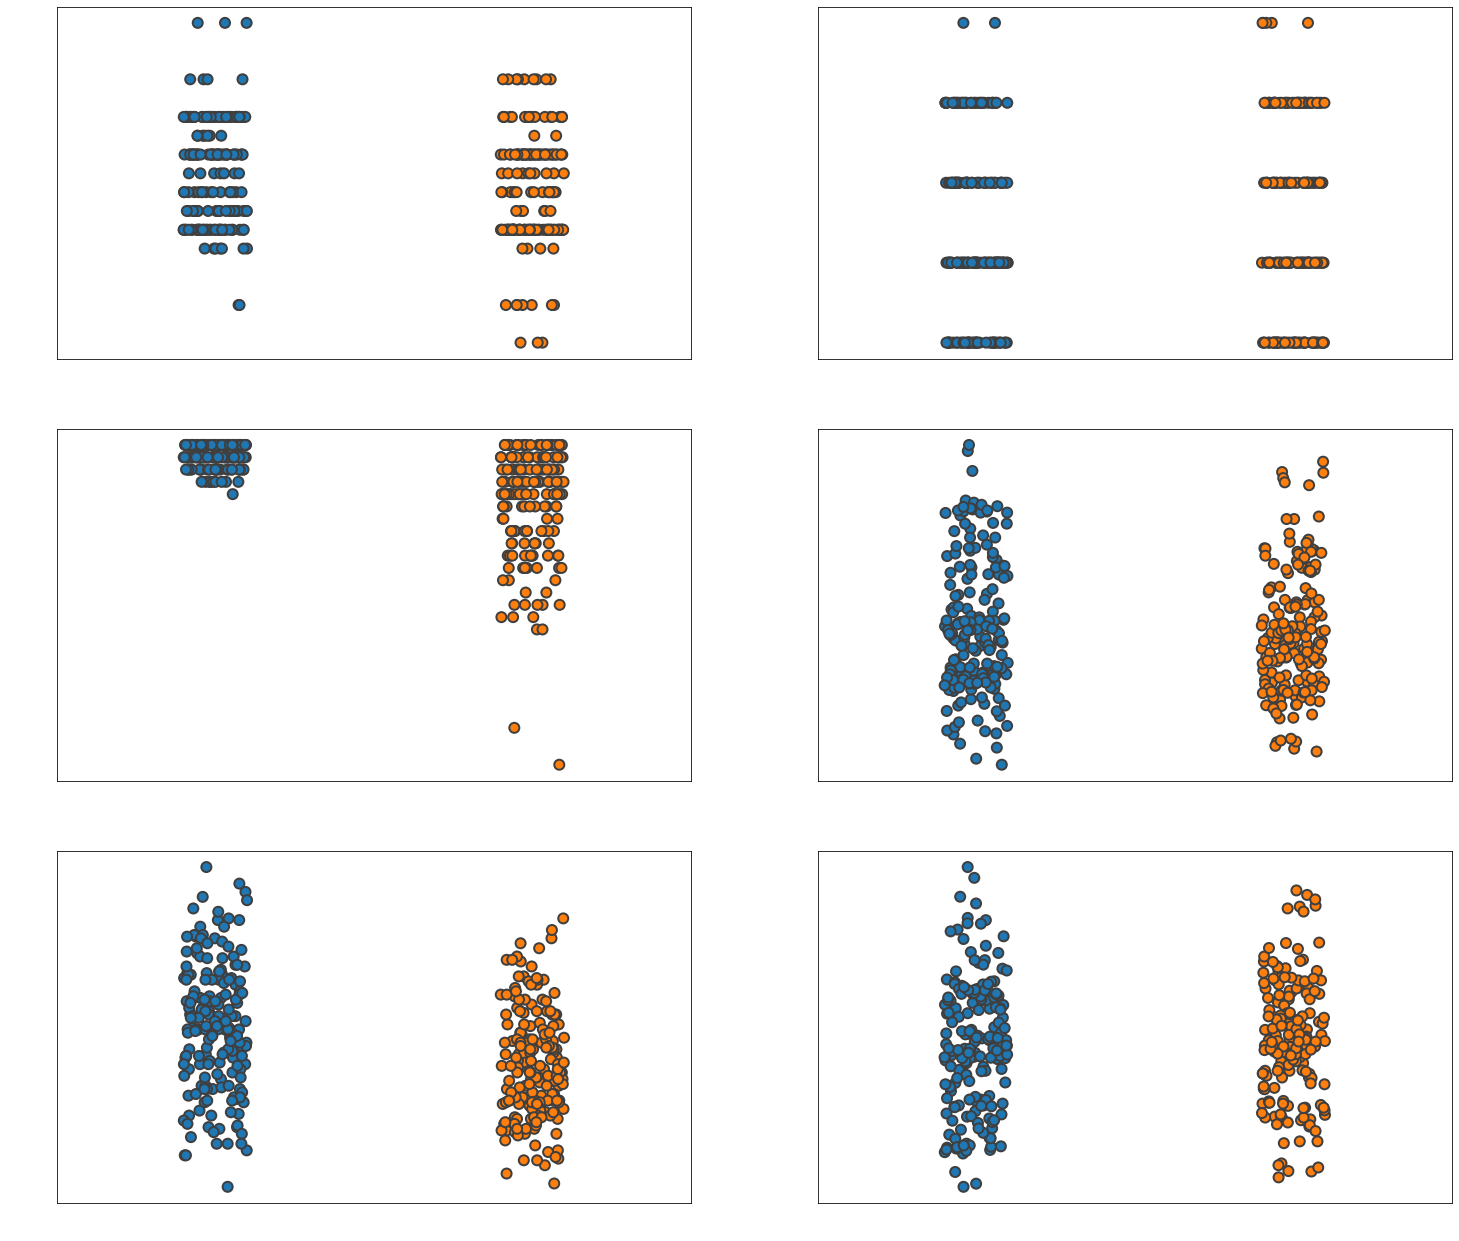

In [ ]:
with plt.rc_context({'xtick.color':'white', 'ytick.color':'white', 
                     'axes.labelcolor': 'white'}):
  plt.figure(figsize=(25,22))
      
  plt.subplot(3,2,1)
  sns.stripplot(x="Group", y="EDUC", data=alzheimer_df, size=10, linewidth=2)

  plt.subplot(3,2,2)
  sns.stripplot(x="Group", y="SES", data=alzheimer_df, size=10, linewidth=2)

  plt.subplot(3,2,3)
  sns.stripplot(x="Group", y="MMSE", data=alzheimer_df, size=10, linewidth=2)

  plt.subplot(3,2,4)
  sns.stripplot(x="Group", y="eTIV", data=alzheimer_df, size=10, linewidth=2)

  plt.subplot(3,2,5)
  sns.stripplot(x="Group", y="nWBV", data=alzheimer_df, size=10, linewidth=2)

  plt.subplot(3,2,6)
  sns.stripplot(x="Group", y="ASF", data=alzheimer_df, size=10, linewidth=2)

### ***Connections?***


> *Looking at the plots above, there does not seem to be any obvious connections between any of our features and Dementia Diagnosis.*


> ***It may be worthwhile to note that the MMSE plot for non-demented scores are grouped near 26-30 as expected. The demented group scores are a lot more spread out but still have a high concentration at 25 and above.***










In [ ]:
# variables to work with
alzheimer_df = alzheimer_df[["Gendre_M", "Age", "EDUC", "SES", "MMSE", 'eTIV', "nWBV", 'ASF', "Group"]]

In [ ]:
# features
X = alzheimer_df.iloc[:, :-1].values
# target 
y = alzheimer_df.iloc[:, -1].values

In [ ]:
# train our data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) #20% training set

### ***KNN Classifier***

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

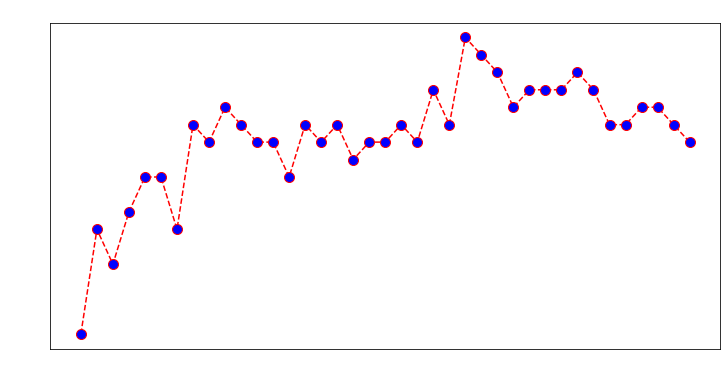

In [ ]:
with plt.rc_context({'xtick.color':'white', 'ytick.color':'white',
                     'axes.labelcolor': 'white'}):
  plt.figure(figsize=(12, 6))
  plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
          markerfacecolor='blue', markersize=10)
  plt.title('Error Rate K Value', color='white')
  plt.xlabel('K Value', color='white')
  plt.ylabel('Mean Error', color='white')

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
knn_1_score = knn.score(X_test, y_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy of KNN (k = 1): {:.3f}'.format(knn_1_score))

[[41  2]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        43
           1       0.93      0.84      0.89        32

    accuracy                           0.91        75
   macro avg       0.91      0.90      0.90        75
weighted avg       0.91      0.91      0.91        75

Accuracy of KNN (k = 1): 0.760


A confusion Matrix will be conducted after each test to see how well it performed. 

In [ ]:
# seperating target and feature into own dataframes 
alzheimer_diagnosis = alzheimer_df['Group']
alzheimer_df = alzheimer_df.drop(['Group'], axis=1)

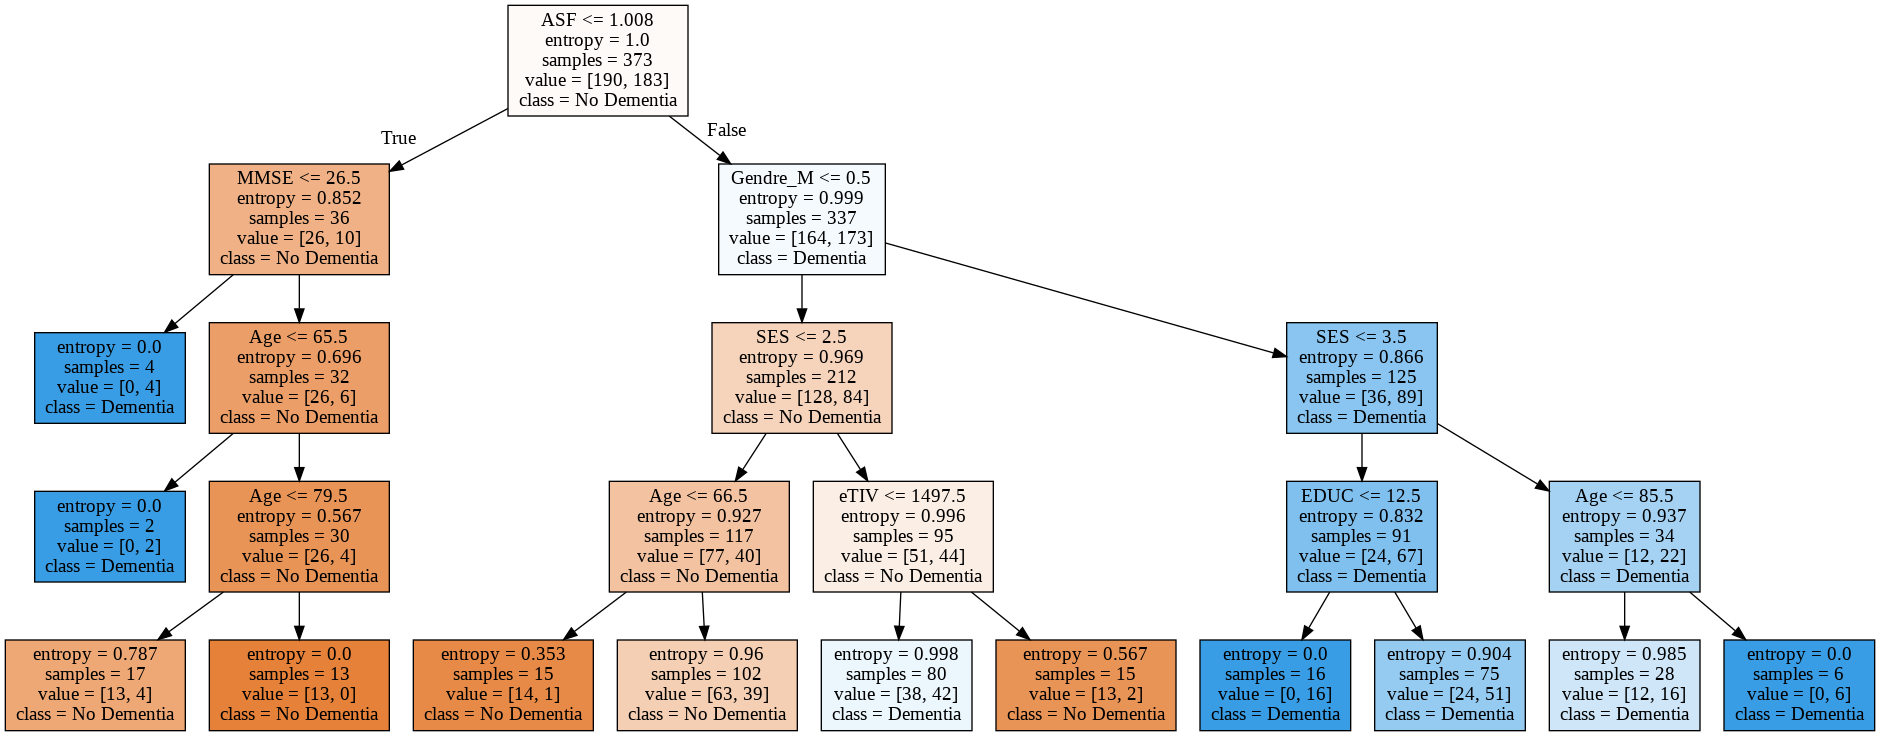

In [ ]:
# This is the model that you'll be using
from sklearn import tree

# A convenience for displaying visualizations
from IPython.display import Image

# Packages for rendering the tree
import pydotplus
import graphviz

# Initialize and train the tree
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1
)
decision_tree.fit(alzheimer_df, alzheimer_diagnosis)

# Render the tree
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=alzheimer_df.columns,
    class_names=['No Dementia', 'Dementia'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)

dt_score = dt.score(X_test, y_test)
dt_predictions = dt.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy of Decision Tree: {:.3f} '.format(dt_score))

[[41  2]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        43
           1       0.93      0.84      0.89        32

    accuracy                           0.91        75
   macro avg       0.91      0.90      0.90        75
weighted avg       0.91      0.91      0.91        75

Accuracy of Decision Tree: 0.760 


### ***Random Forest***

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X = alzheimer_df  # Features
y =alzheimer_diagnosis # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[48 10]
 [10 44]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        58
           1       0.81      0.81      0.81        54

    accuracy                           0.82       112
   macro avg       0.82      0.82      0.82       112
weighted avg       0.82      0.82      0.82       112

Accuracy: 0.8214285714285714


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(max_depth=4, n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=alzheimer_df.columns).sort_values(ascending=False)
feature_imp

MMSE        0.439744
nWBV        0.143706
eTIV        0.102124
ASF         0.091915
EDUC        0.080884
Age         0.065759
Gendre_M    0.046795
SES         0.029074
dtype: float64

No handles with labels found to put in legend.


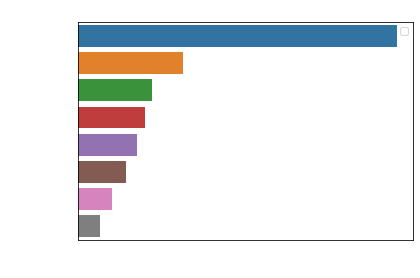

In [ ]:
# Creating a bar plot
with plt.rc_context({'xtick.color':'white', 'ytick.color':'white', 
                     'axes.labelcolor': 'white'}):
  sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
  plt.xlabel('Feature Importance Score', color='white')
  plt.ylabel('Features',color='white')
  plt.title("Visualizing Important Features",color='white')
  plt.legend()
  plt.show()

I will be keeping all the features as the last few still hold good weight. 

### ***ADA Boosting*** 

In [ ]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=4),
    n_estimators=100
)
model = classifier.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[50 14]
 [10 38]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.81        64
           1       0.73      0.79      0.76        48

    accuracy                           0.79       112
   macro avg       0.78      0.79      0.78       112
weighted avg       0.79      0.79      0.79       112

Accuracy: 0.7857142857142857


In [ ]:
X = alzheimer_df
y = alzheimer_diagnosis

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.25,
                                                    random_state=1)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [KNeighborsClassifier(n_neighbors=1), 
               DecisionTreeClassifier(random_state=1),
               RandomForestClassifier(random_state=1),
               AdaBoostClassifier(random_state=1)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

Looking at the models, it is telling us that the KNeighborsClassifier is giving us the best results. It does have a little bit of lower accuracy but the precision, recall, and F1 scores all performed better than the other models along with the graph above regarding AUC. As you can see above being categorized into demented or non-demented relies heavily on MMSE and nWBV and less on Age, Gendre, SES even though they are still important. 